# Imports 

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import random
import itertools
random.set_seed(404)
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard
from time import strftime

from matplotlib import cm


from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
import os
import numpy as np 
import tensorflow as tf 
import keras
from keras.datasets import cifar10

# Constants

In [3]:
LABEL_NAMES = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

LOG_DIR = 'tensorboard_cifar_logs/'

# Get the data

In [4]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

# Explore the data

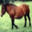

In [5]:
pic = array_to_img(x_train_all[7])
pic

In [6]:
LABEL_NAMES[y_train_all[7][0]]

'horse'

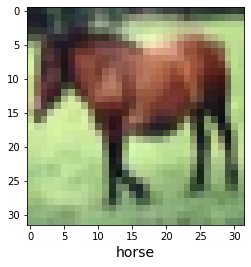

In [7]:
plt.imshow(x_train_all[7])
plt.xlabel(LABEL_NAMES[y_train_all[7][0]], fontsize=14)
plt.show()

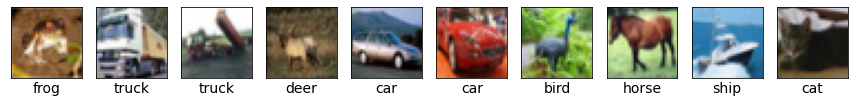

In [8]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 14)
    plt.imshow(x_train_all[i])

In [9]:
nr_images, x,y,c = x_train_all.shape
print(f'images  = {nr_images}\t | width = {x}\t| height = {y}\t|channels = {c}')

images  = 50000	 | width = 32	| height = 32	|channels = 3


## Pre process data

In [10]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [11]:
x_train_all , x_test = x_train_all/255.0, x_test/255.0

In [12]:
x_train_all[0][0][0][0]

0.23137254901960785

In [13]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [14]:
x_train_all.shape

(50000, 3072)

In [15]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is{x_test.shape}')

Shape of x_test is(10000, 3072)


## Create Validation Dataset

In [16]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [17]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Create a small dataset for illustration

In [18]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = x_train[:SMALL_TRAIN_SIZE]

# Define the neural network with Keras

In [19]:
model_1 = Sequential([
    
    Dense(units = 128, input_dim=TOTAL_INPUTS, activation='relu'),
    Dense(units = 64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')    
    
])


model_1.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensor Board (Visulaizing Learning)

In [22]:
def get_tensorboard (model_name):

    folder_name = f'{model_name}at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Sucessfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model 

In [23]:
samples_per_batch = 1000

In [24]:
%%time
nr_epochos = 150
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochos,callbacks=[get_tensorboard('Model_1')])

Sucessfully created directory
Epoch 1/150
40/40 [==============================] - 2s 50ms/step - loss: 2.2134 - accuracy: 0.1985
Epoch 2/150
40/40 [==============================] - 2s 45ms/step - loss: 2.0350 - accuracy: 0.2795
Epoch 3/150
40/40 [==============================] - 2s 46ms/step - loss: 1.9327 - accuracy: 0.3106
Epoch 4/150
40/40 [==============================] - 2s 47ms/step - loss: 1.8634 - accuracy: 0.3337
Epoch 5/150
40/40 [==============================] - 2s 47ms/step - loss: 1.8037 - accuracy: 0.3632
Epoch 6/150
40/40 [==============================] - 2s 50ms/step - loss: 1.7675 - accuracy: 0.3755
Epoch 7/150
40/40 [==============================] - 2s 50ms/step - loss: 1.7389 - accuracy: 0.3846
Epoch 8/150
40/40 [==============================] - 2s 51ms/step - loss: 1.7086 - accuracy: 0.3920
Epoch 9/150
40/40 [==============================] - 2s 56ms/step - loss: 1.6946 - accuracy: 0.3963
Epoch 10/150
40/40 [==============================] - 2s 47ms/step - l

40/40 [==============================] - 2s 50ms/step - loss: 1.2471 - accuracy: 0.5565
Epoch 82/150
40/40 [==============================] - 2s 53ms/step - loss: 1.2468 - accuracy: 0.5560
Epoch 83/150
40/40 [==============================] - 2s 48ms/step - loss: 1.2491 - accuracy: 0.5555
Epoch 84/150
40/40 [==============================] - 2s 48ms/step - loss: 1.2333 - accuracy: 0.5615
Epoch 85/150
40/40 [==============================] - 2s 54ms/step - loss: 1.2362 - accuracy: 0.5605
Epoch 86/150
40/40 [==============================] - 2s 51ms/step - loss: 1.2254 - accuracy: 0.5652
Epoch 87/150
40/40 [==============================] - 2s 60ms/step - loss: 1.2297 - accuracy: 0.5638
Epoch 88/150
40/40 [==============================] - 3s 67ms/step - loss: 1.2186 - accuracy: 0.5684
Epoch 89/150
40/40 [==============================] - 3s 69ms/step - loss: 1.2193 - accuracy: 0.5637
Epoch 90/150
40/40 [==============================] - 3s 67ms/step - loss: 1.2184 - accuracy: 0.5668
Epo

# Making Prediction on Individual Images

In [25]:
x_val[0].shape

(3072,)

In [26]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [27]:
np.set_printoptions(precision = 3)

In [28]:
model_1.predict(test)

array([[1.822e-02, 6.574e-04, 4.701e-02, 1.454e-01, 2.339e-02, 1.418e-01,
        5.976e-01, 2.562e-02, 1.875e-05, 2.429e-04]], dtype=float32)

In [29]:
model_1.predict(x_val)

array([[1.822e-02, 6.575e-04, 4.701e-02, ..., 2.562e-02, 1.875e-05,
        2.429e-04],
       [4.509e-02, 3.570e-01, 9.016e-05, ..., 6.934e-04, 5.247e-03,
        5.908e-01],
       [7.753e-04, 4.786e-03, 5.074e-05, ..., 2.439e-04, 1.401e-04,
        9.936e-01],
       ...,
       [4.551e-04, 3.047e-01, 1.990e-04, ..., 6.094e-05, 2.174e-02,
        6.508e-01],
       [3.856e-02, 7.216e-01, 9.357e-03, ..., 2.865e-04, 3.070e-02,
        1.836e-01],
       [1.000e-03, 4.004e-04, 1.376e-02, ..., 6.542e-01, 1.569e-04,
        7.055e-05]], dtype=float32)

In [30]:
model_1.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6])

In [31]:
y_val[0]

array([6], dtype=uint8)

In [32]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_1.predict_classes(test_img)[0]
    print(f'Actual value:{y_val[number][0]} vs.predicted:{predicted_val}')

Actual value:6 vs.predicted:6
Actual value:9 vs.predicted:9
Actual value:9 vs.predicted:9
Actual value:4 vs.predicted:6
Actual value:1 vs.predicted:8
Actual value:1 vs.predicted:6
Actual value:2 vs.predicted:2
Actual value:7 vs.predicted:7
Actual value:8 vs.predicted:8
Actual value:3 vs.predicted:9


# Evaluation 

In [33]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 2s 6ms/step - loss: 1.5292 - accuracy: 0.4831
Test loss is 1.53 and test accuracy is 48.3%


## Confusion Matrix

In [34]:
predictions = model_1.predict_classes(x_test)
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [35]:
confusion_matrix.shape

(10, 10)

In [36]:
nr_rows = confusion_matrix.shape[0]
nr_colos = confusion_matrix.shape[1]

In [37]:
confusion_matrix.max()

668

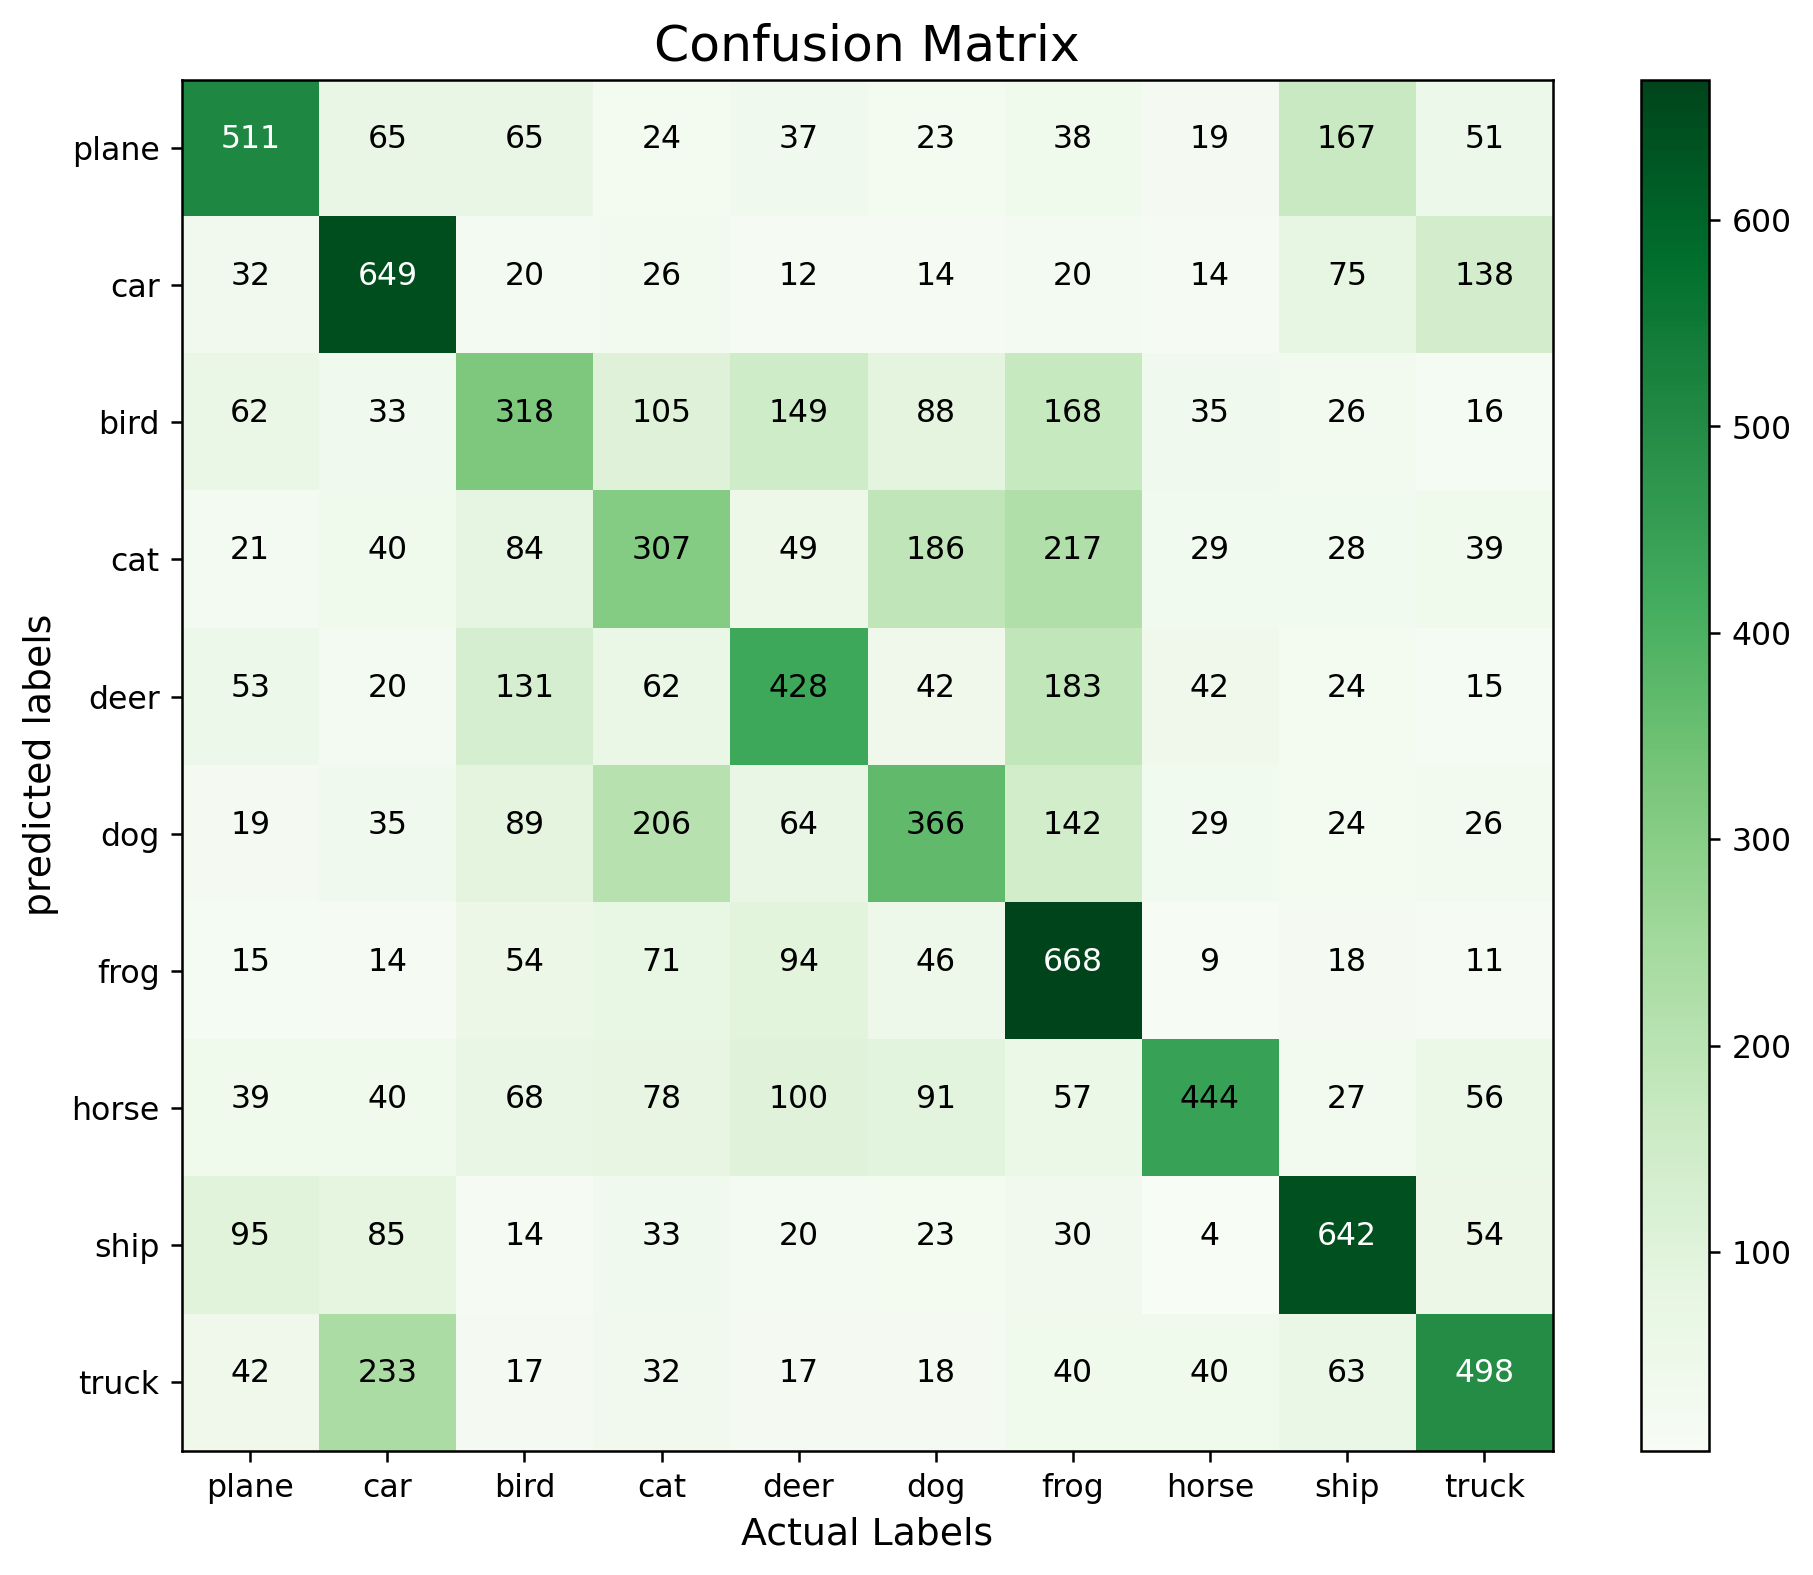

In [38]:
plt.figure(figsize=(10,8), dpi=227)
plt.imshow(confusion_matrix, cmap=plt.cm.Greens)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel('Actual Labels', fontsize=12)
plt.ylabel('predicted labels', fontsize=12)
NR_CLASSES = 10
tick_marks = np.arange(NR_CLASSES)
plt.colorbar()
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)


for i, j in itertools.product(range(nr_rows), range(nr_colos)):
    plt.text(j, i, confusion_matrix[i, j], horizontalalignment='center', color='white' if confusion_matrix[i,j]>
             450 else 'black')
    
plt.show()

In [39]:
# true positives
np.diag(confusion_matrix)

array([511, 649, 318, 307, 428, 366, 668, 444, 642, 498])

In [40]:
recall = np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis=1)
recall

array([0.511, 0.649, 0.318, 0.307, 0.428, 0.366, 0.668, 0.444, 0.642,
       0.498])

In [41]:
precison = np.diag(confusion_matrix)/ np.sum(confusion_matrix, axis =0)

In [42]:
avg_recall = np.mean(recall)
print(f'model 1 recall score is {avg_recall:.2%}')

model 1 recall score is 48.31%


In [43]:
avg_precision = np.mean(precison)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 48.86%


In [44]:
f1_score = 2* (avg_precision * avg_recall)/ (avg_precision + avg_recall)
print(f'Model 1 f score is {f1_score:.2%}')

Model 1 f score is 48.59%
